In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
x, y = make_blobs(random_state=1)

In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [6]:
print(kmeans.labels_)

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [5]:
print(kmeans.predict(x))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


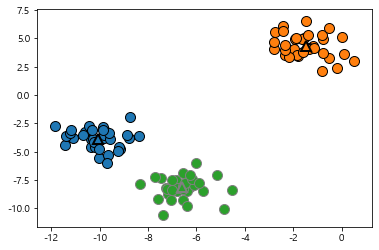

In [9]:
mglearn.discrete_scatter(x[:,0],x[:,1],kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
                         [0,1,2], markers='^', markeredgewidth=2) #marker 두께
plt.show()

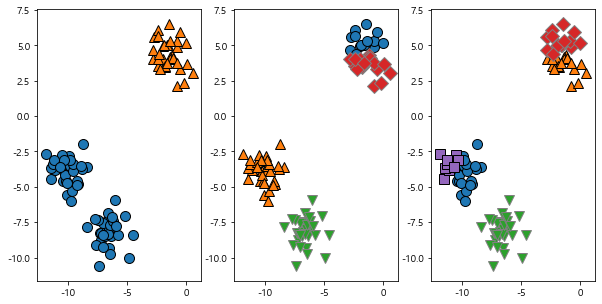

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(10,5))

# k가 2개
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(x)
assignments2 = kmeans2.labels_

mglearn.discrete_scatter(x[:,0], x[:,1], assignments2, ax=axes[0])

# k 4개
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(x)
assignments4 = kmeans4.labels_

mglearn.discrete_scatter(x[:,0], x[:,1], assignments4, ax=axes[1])

# k 5개
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(x)
assignments5 = kmeans5.labels_

mglearn.discrete_scatter(x[:,0], x[:,1], assignments5, ax=axes[2])

### k-means 실패사례

In [21]:
x, y = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)

In [22]:
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(x)

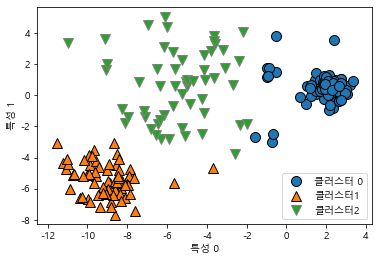

In [24]:
#1. 군집을 만들 수 없을 때 k-means 값이 안좋을 수 있다
mglearn.discrete_scatter(x[:,0], x[:,1], y_pred)
plt.legend(['클러스터 0', '클러스터1', '클러스터2'], loc='best')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()
#클러스터2: 데이터들이 군집을 형성할 만큼 공통점을 가지고 있지 않다

In [26]:
x, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경
transformation = rng.normal(size=(2,2))
x = np.dot(x, transformation)

In [27]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
y_pred = kmeans.predict(x)

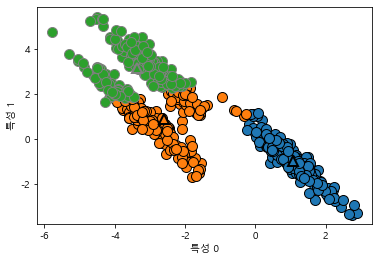

In [29]:
#2. 길게 늘어진 데이터에 대해서 좋은 결과 얻기 어려움
mglearn.discrete_scatter(x[:,0], x[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
                         [0,1,2], markers='^', markeredgewidth=2)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

In [30]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 클러스터 2개를 가지는 kmeans
#학습, 예측(y_pred)
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
y_pred = kmeans.predict(x)

Text(0, 0.5, '특성 1')

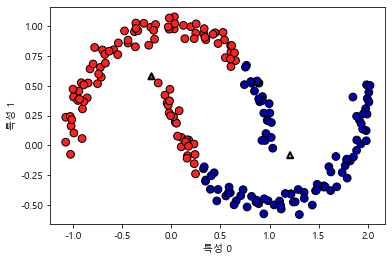

In [31]:
#3. 자유로운 모양의 군집에 대해 좋은 결과 얻기 어려움
plt.scatter(x[:,0], x[:,1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired', edgecolors='k')
plt.xlabel('특성 0')
plt.ylabel('특성 1')